In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [5]:
import graphviz as gv
import matplotlib.pyplot as plt

In [9]:
cancer = load_breast_cancer(as_frame = True)

In [11]:
print(cancer)

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave po

In [12]:
features = cancer['data']
target = cancer['target']

In [13]:
features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [17]:
target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [18]:
target.unique()

array([0, 1])

In [19]:
target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [20]:
f_name = cancer['feature_names']
t_name = cancer['target_names']

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

clf = tree.DecisionTreeClassifier()
model = clf.fit(x_train,y_train)

print(model.get_depth())

model.get_n_leaves()

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

In [53]:
dot_data = tree.export_graphviz(model,feature_names = f_name,class_names = t_name,filled = True) 

In [55]:
graph = gv.Source(dot_data)

In [56]:
graph.render()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [48]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 8822-CA1F

 Directory of C:\Users\M.Srimanth\ Decision Tree

06-07-2024  16:11            42,008  Decision Tree.ipynb
06-07-2024  16:12    <DIR>          .
06-07-2024  14:45    <DIR>          ..
06-07-2024  14:47    <DIR>          .ipynb_checkpoints
06-07-2024  16:12             3,936 default_params
               2 File(s)         45,944 bytes
               3 Dir(s)  286,354,124,800 bytes free


In [52]:
graph.render('default_params')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [50]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


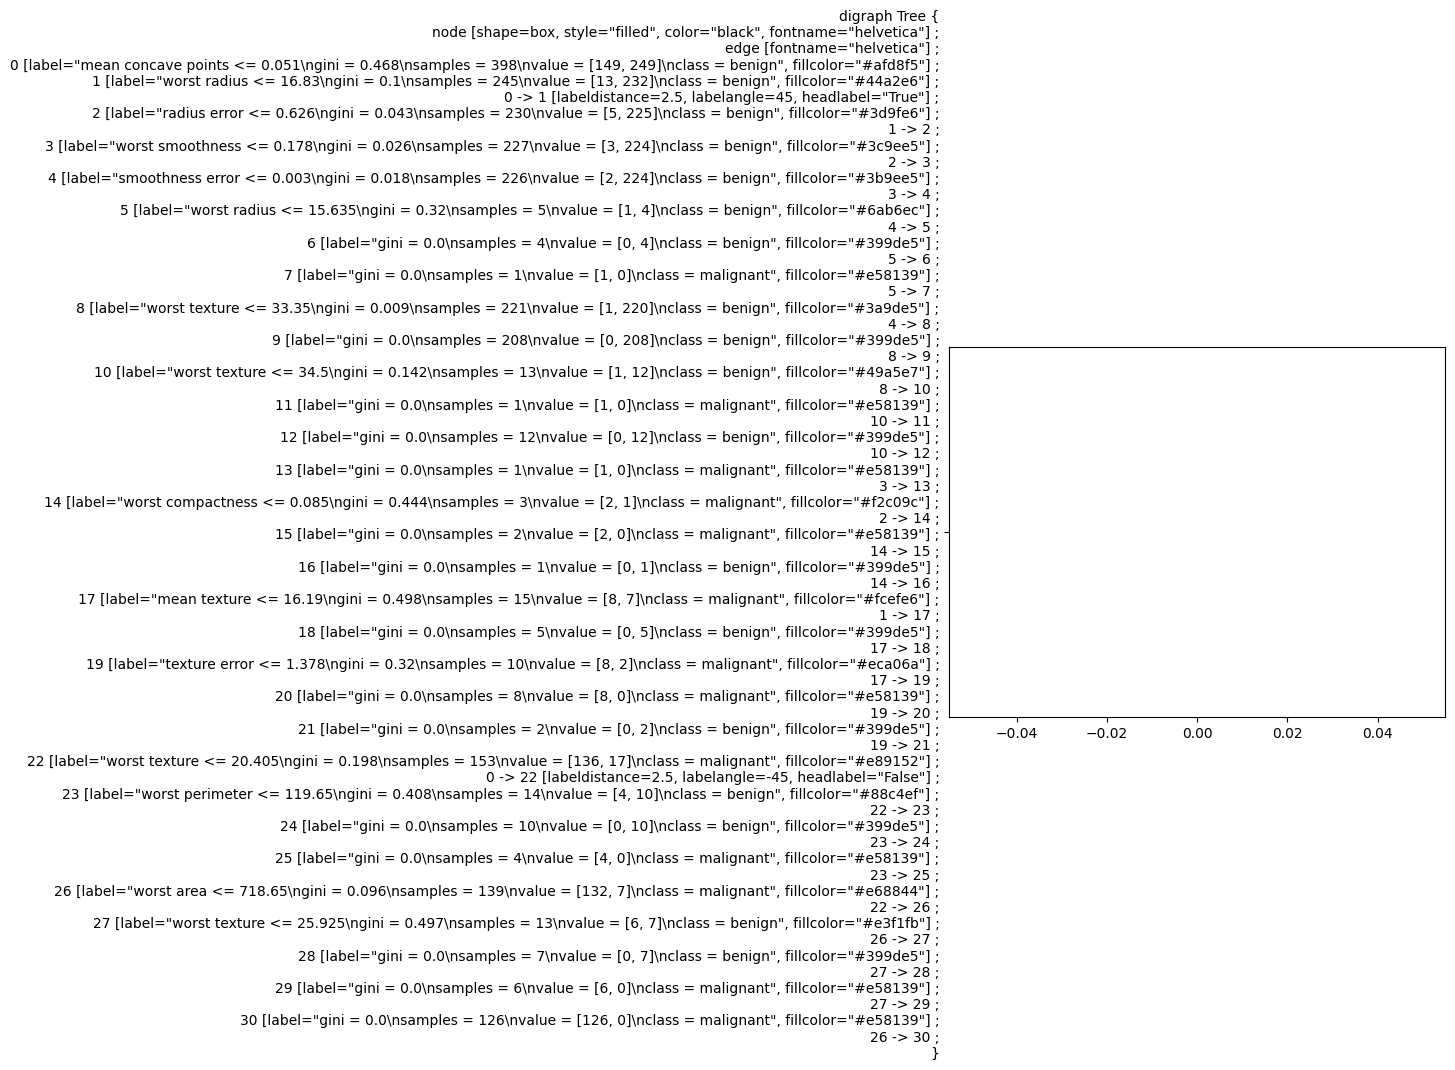

In [59]:
plt.plot(dot_data)

<function matplotlib.pyplot.show(close=None, block=None)>

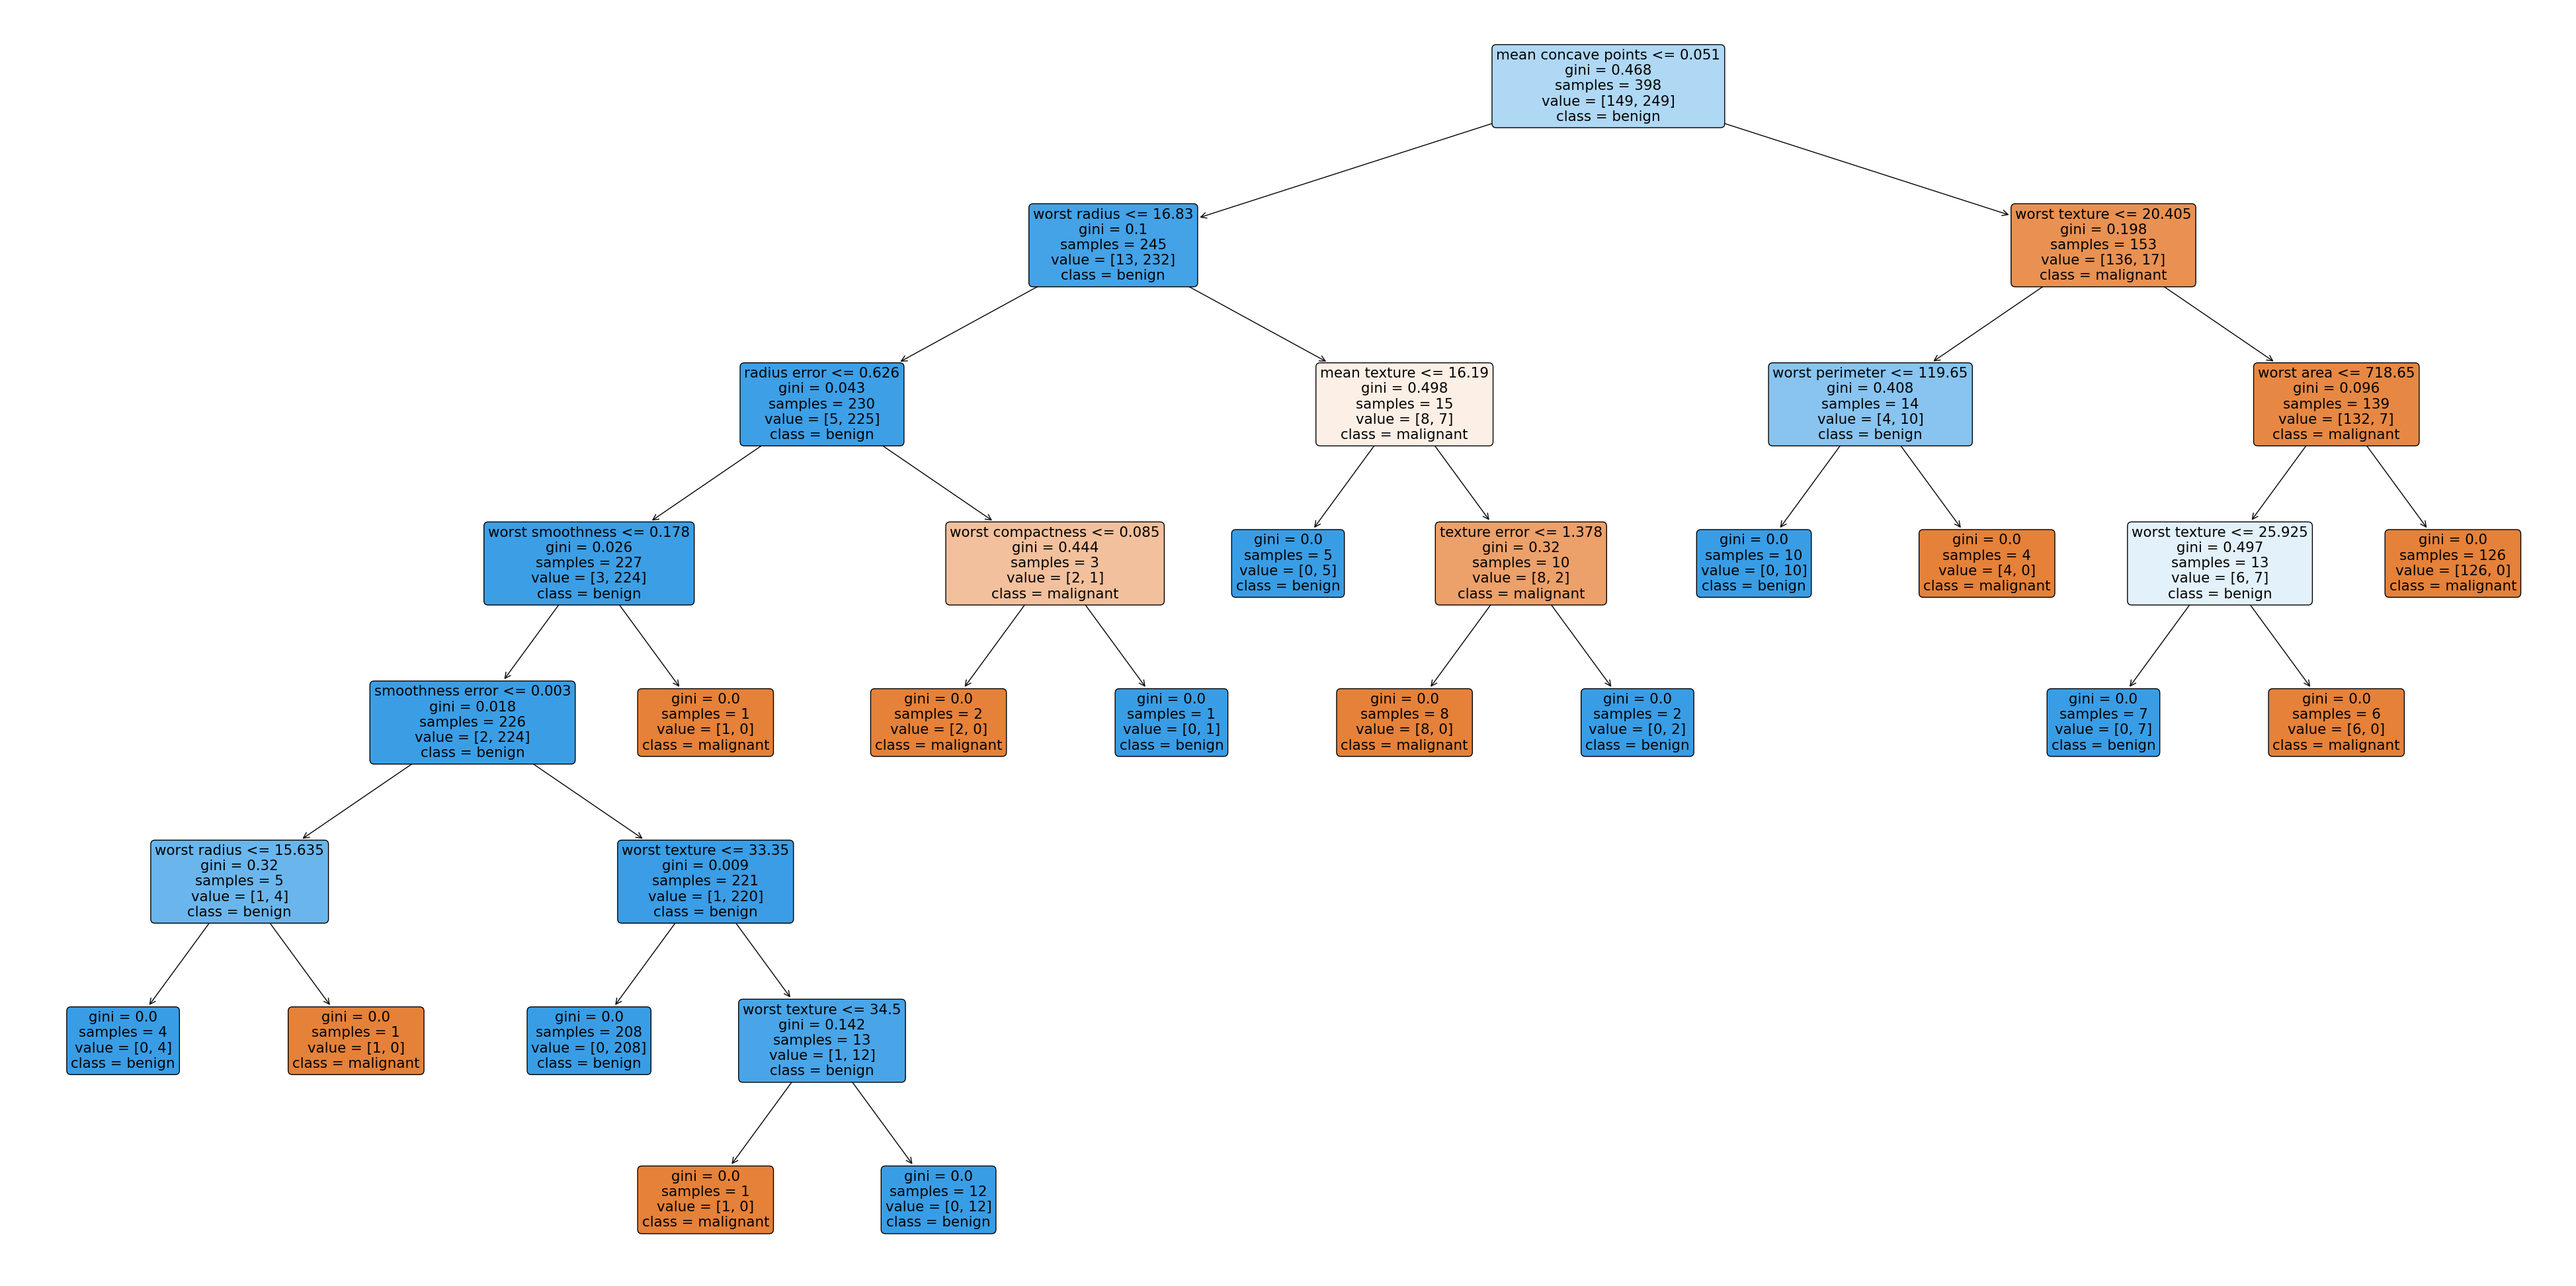

In [73]:
plt.figure(figsize = (50,25))
tree.plot_tree(model,feature_names = f_name,class_names = t_name,filled = True,rounded = True)
plt.show

In [71]:
model.get_depth()

7

In [72]:
model.get_n_leaves()

16

# Experiment 2 max_depth = 4

In [75]:
clf = tree.DecisionTreeClassifier(max_depth = 4)
model = clf.fit(x_train,y_train)

print(model.get_depth())

print(model.get_n_leaves())

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

4
12
Train Data Accuracy  0.9949748743718593
Test Data Accuracy 0.9590643274853801


<function matplotlib.pyplot.show(close=None, block=None)>

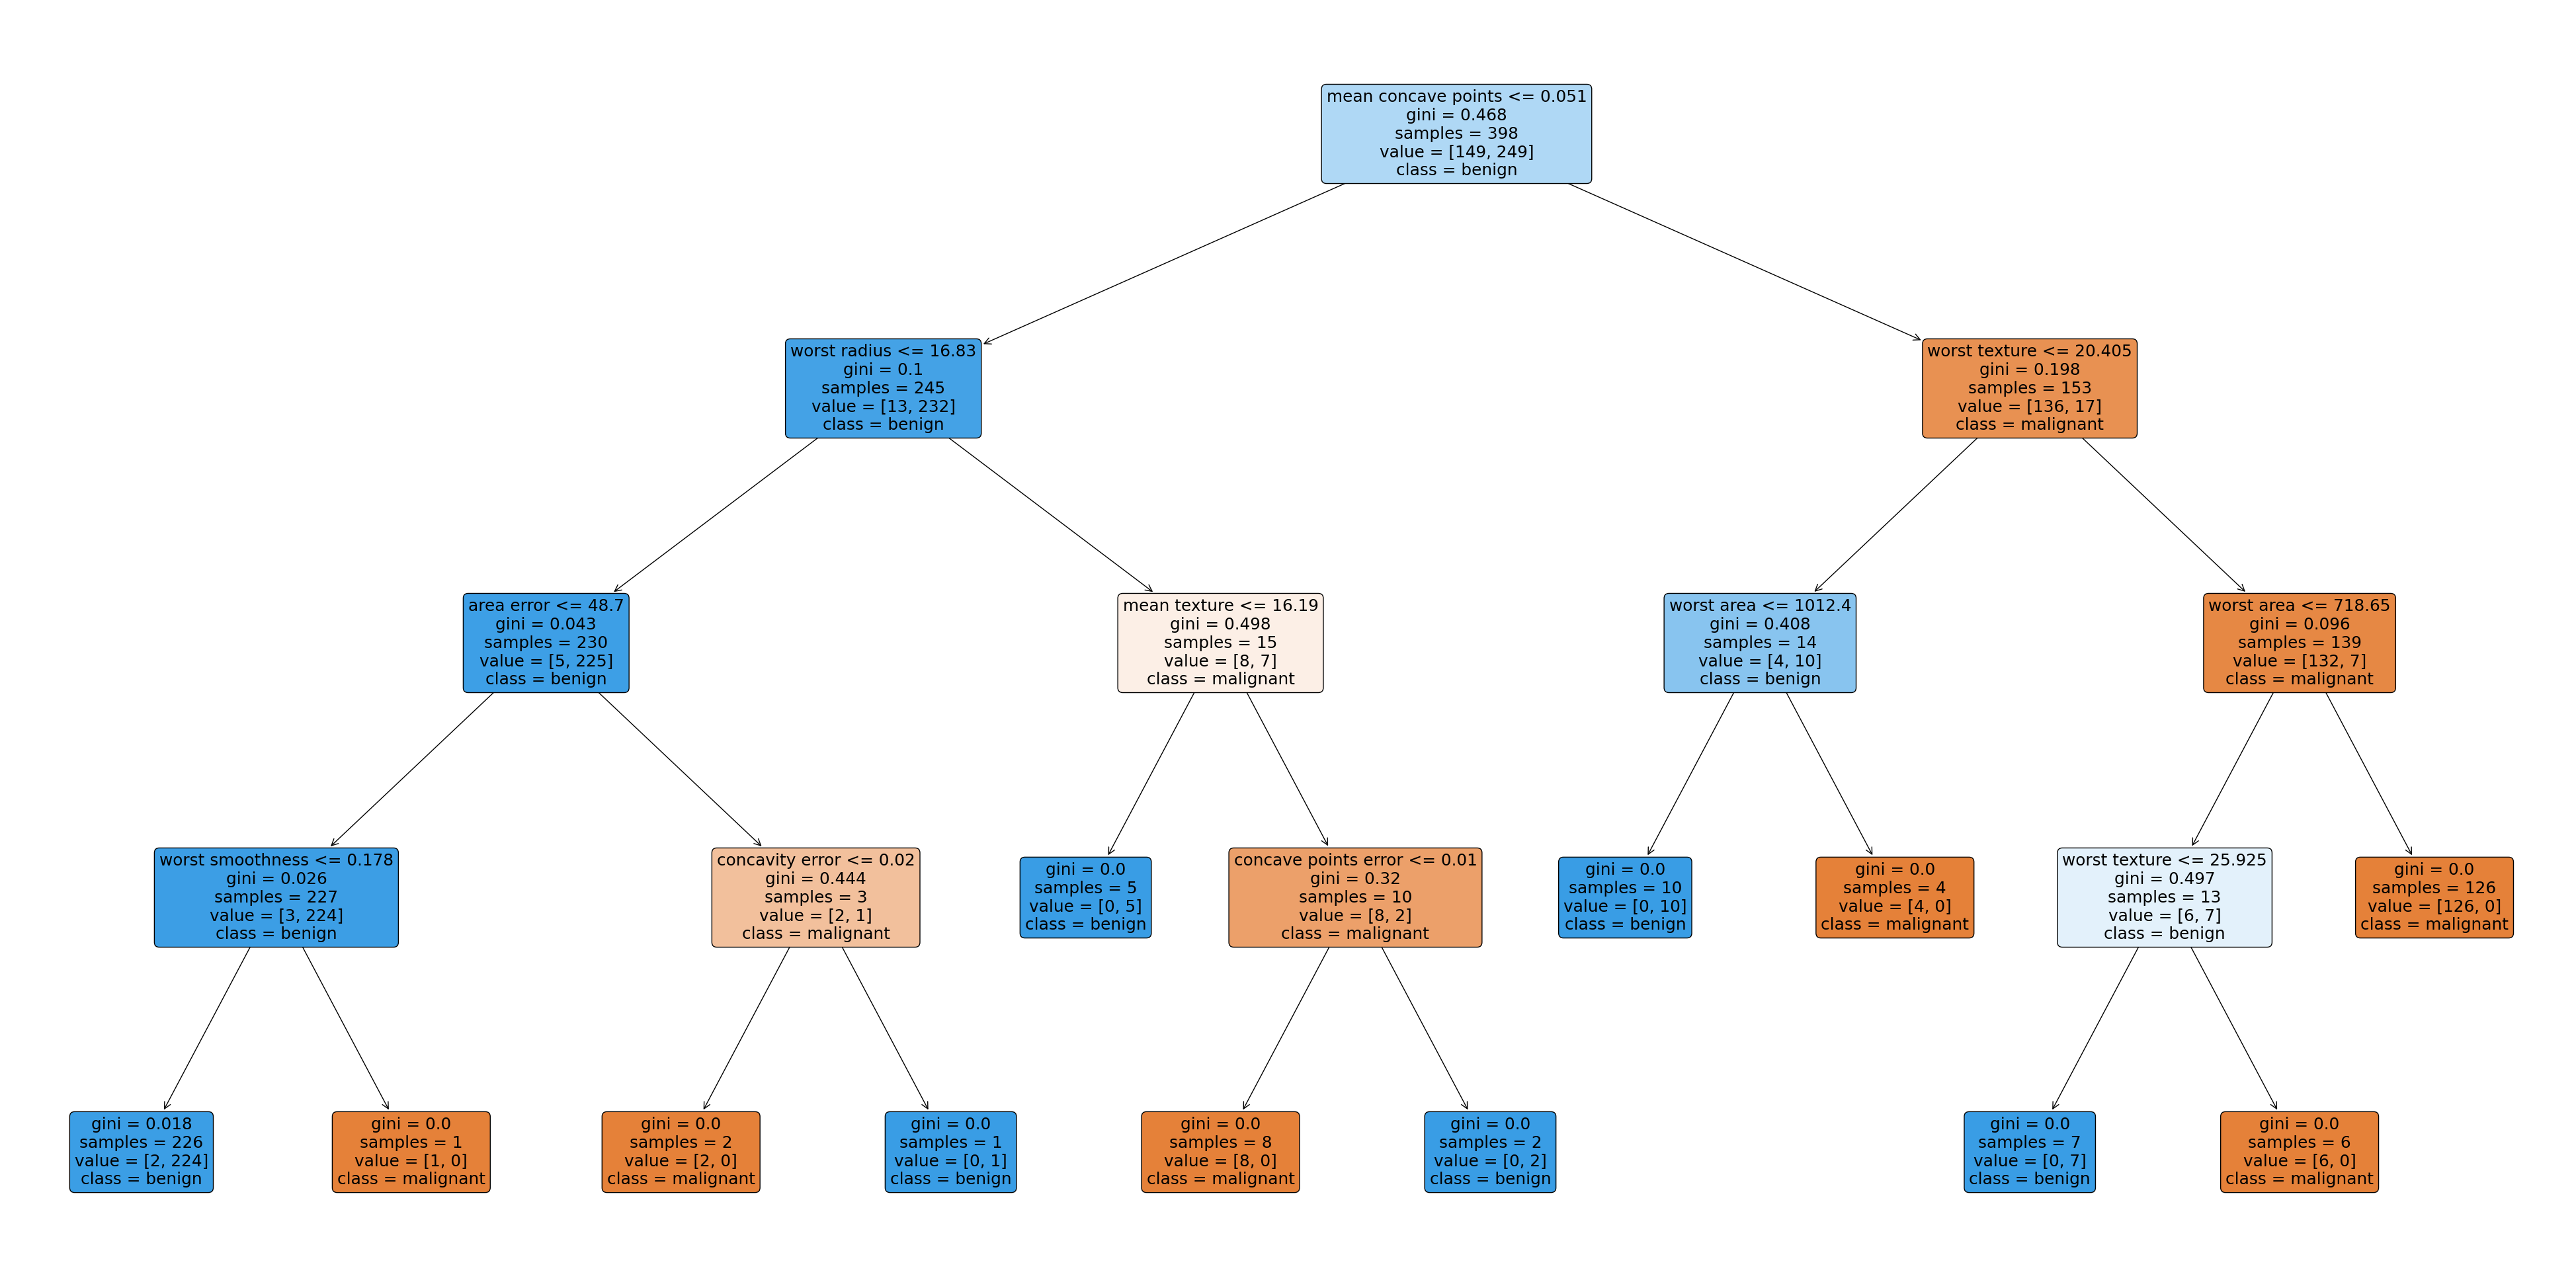

In [76]:
plt.figure(figsize = (50,25))
tree.plot_tree(model,feature_names = f_name,class_names = t_name,filled = True,rounded = True)
plt.show

 # experiment 3 min_samples_feaf

In [79]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 50)
model = clf.fit(x_train,y_train)

print(model.get_depth())

print(model.get_n_leaves())

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

3
5
Train Data Accuracy  0.9246231155778895
Test Data Accuracy 0.8947368421052632


<function matplotlib.pyplot.show(close=None, block=None)>

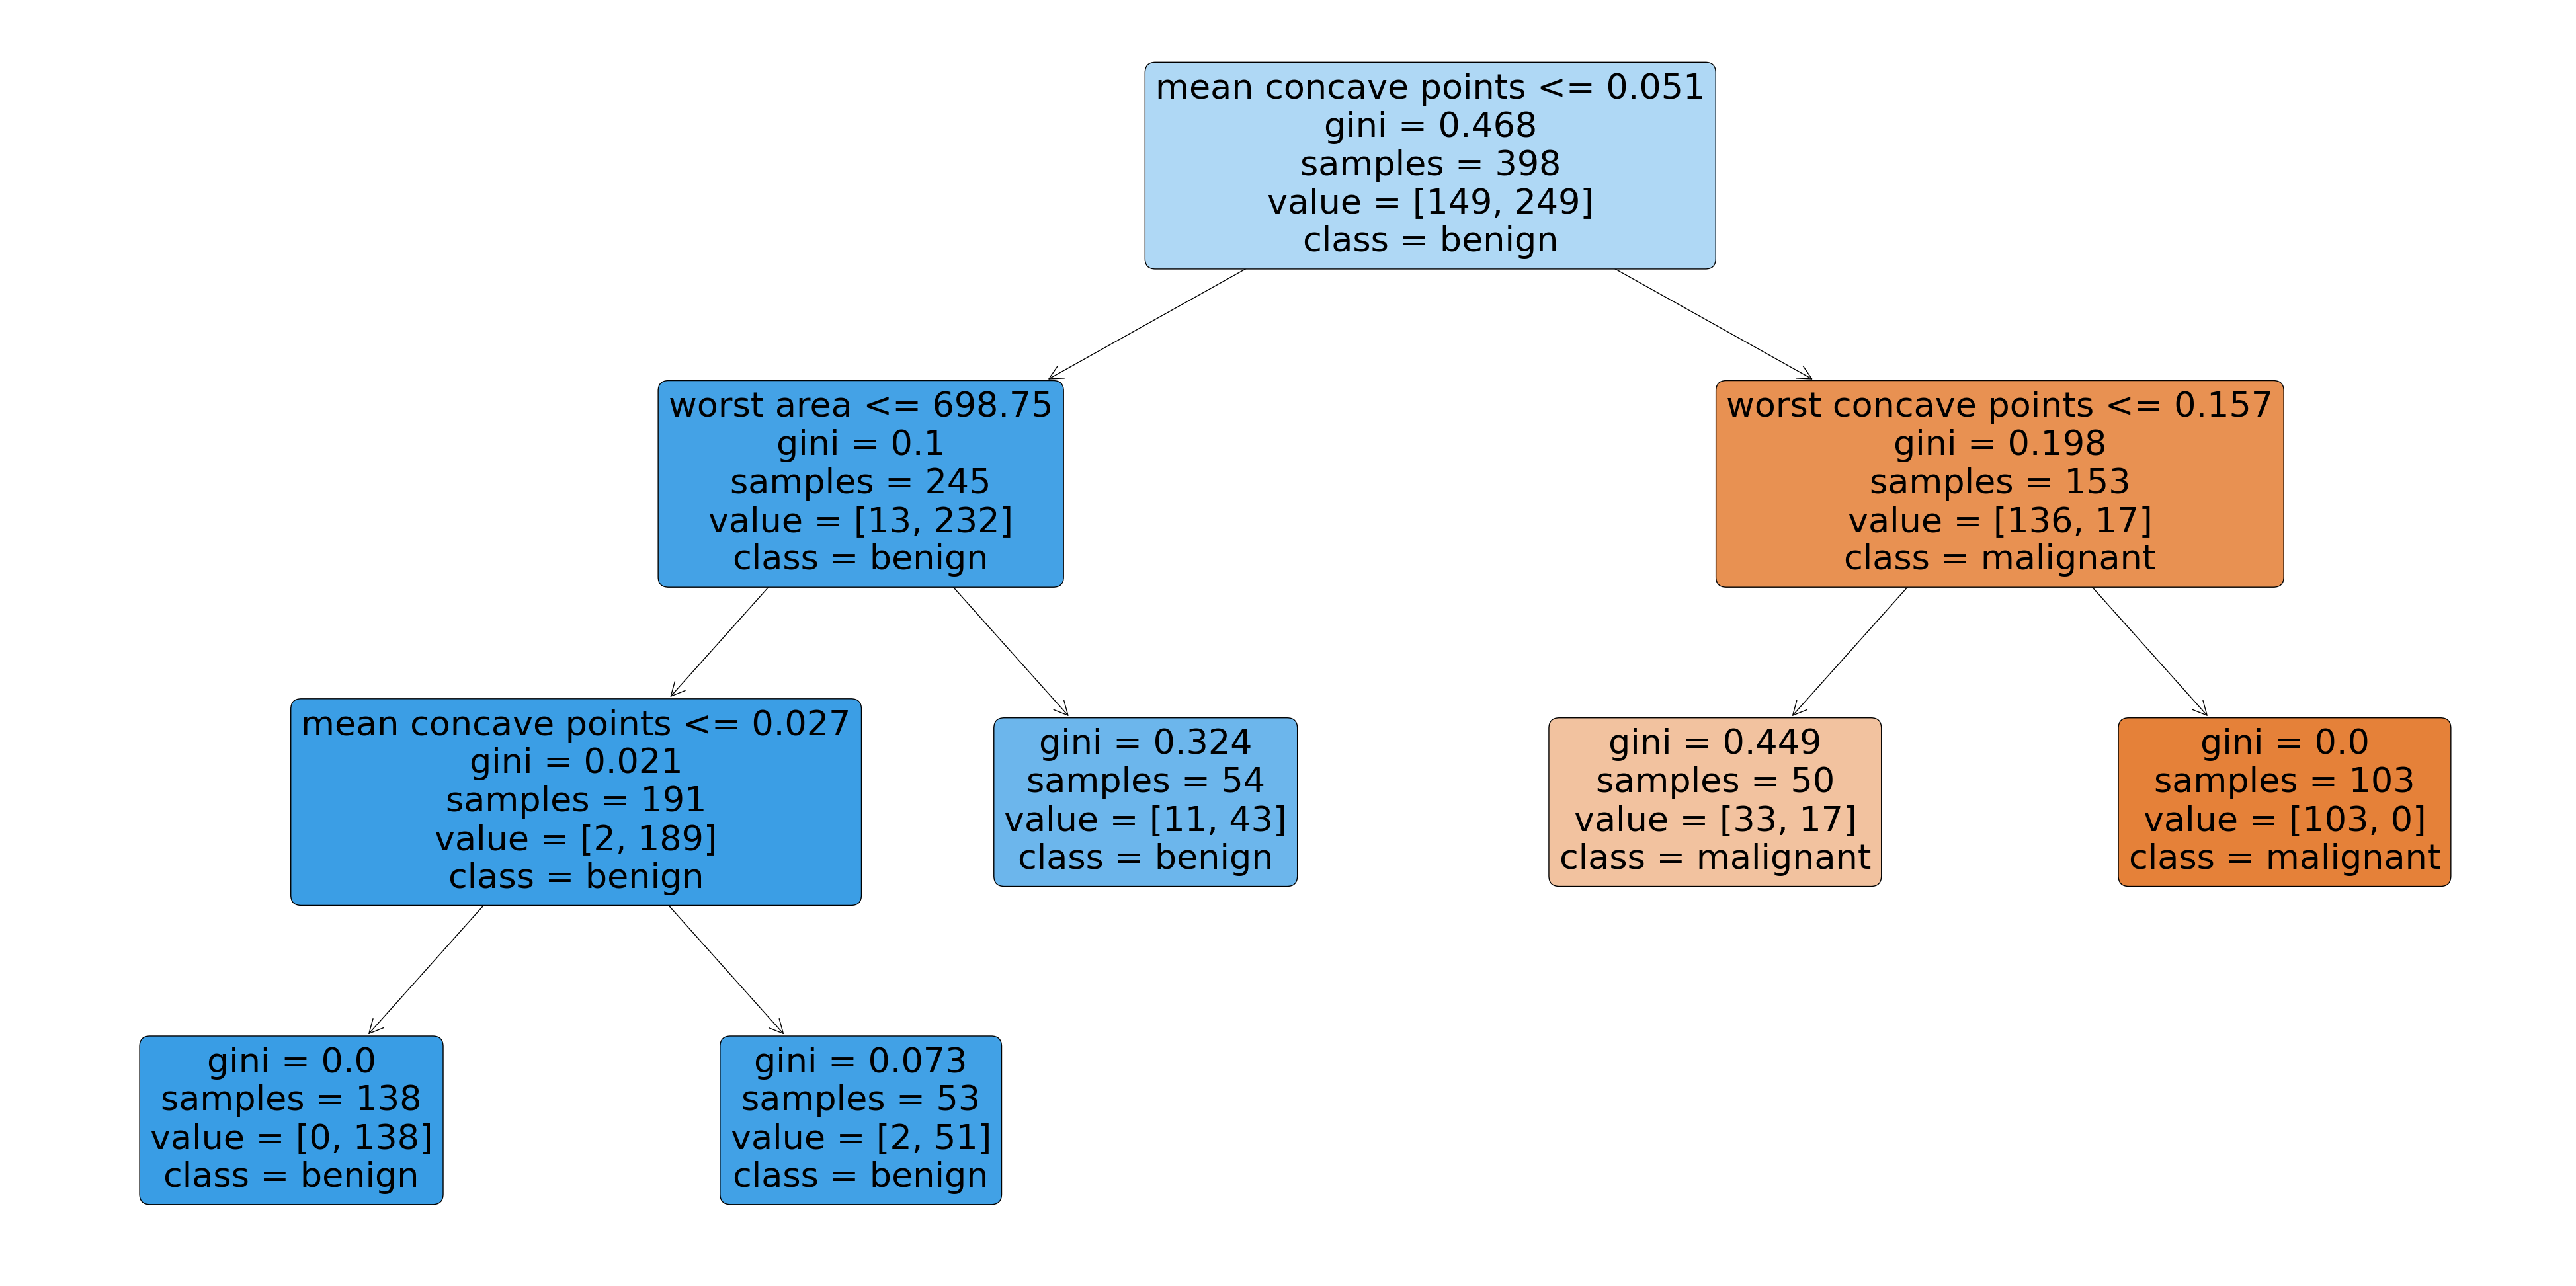

In [82]:
plt.figure(figsize = (50,25))
tree.plot_tree(model,feature_names = f_name,class_names = t_name,filled = True,rounded = True)
plt.show

#  Experiment max_leaf_nodes 

In [88]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8)
model = clf.fit(x_train,y_train)

print(model.get_depth())

print(model.get_n_leaves())

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

4
8
Train Data Accuracy  0.9824120603015075
Test Data Accuracy 0.9649122807017544


<function matplotlib.pyplot.show(close=None, block=None)>

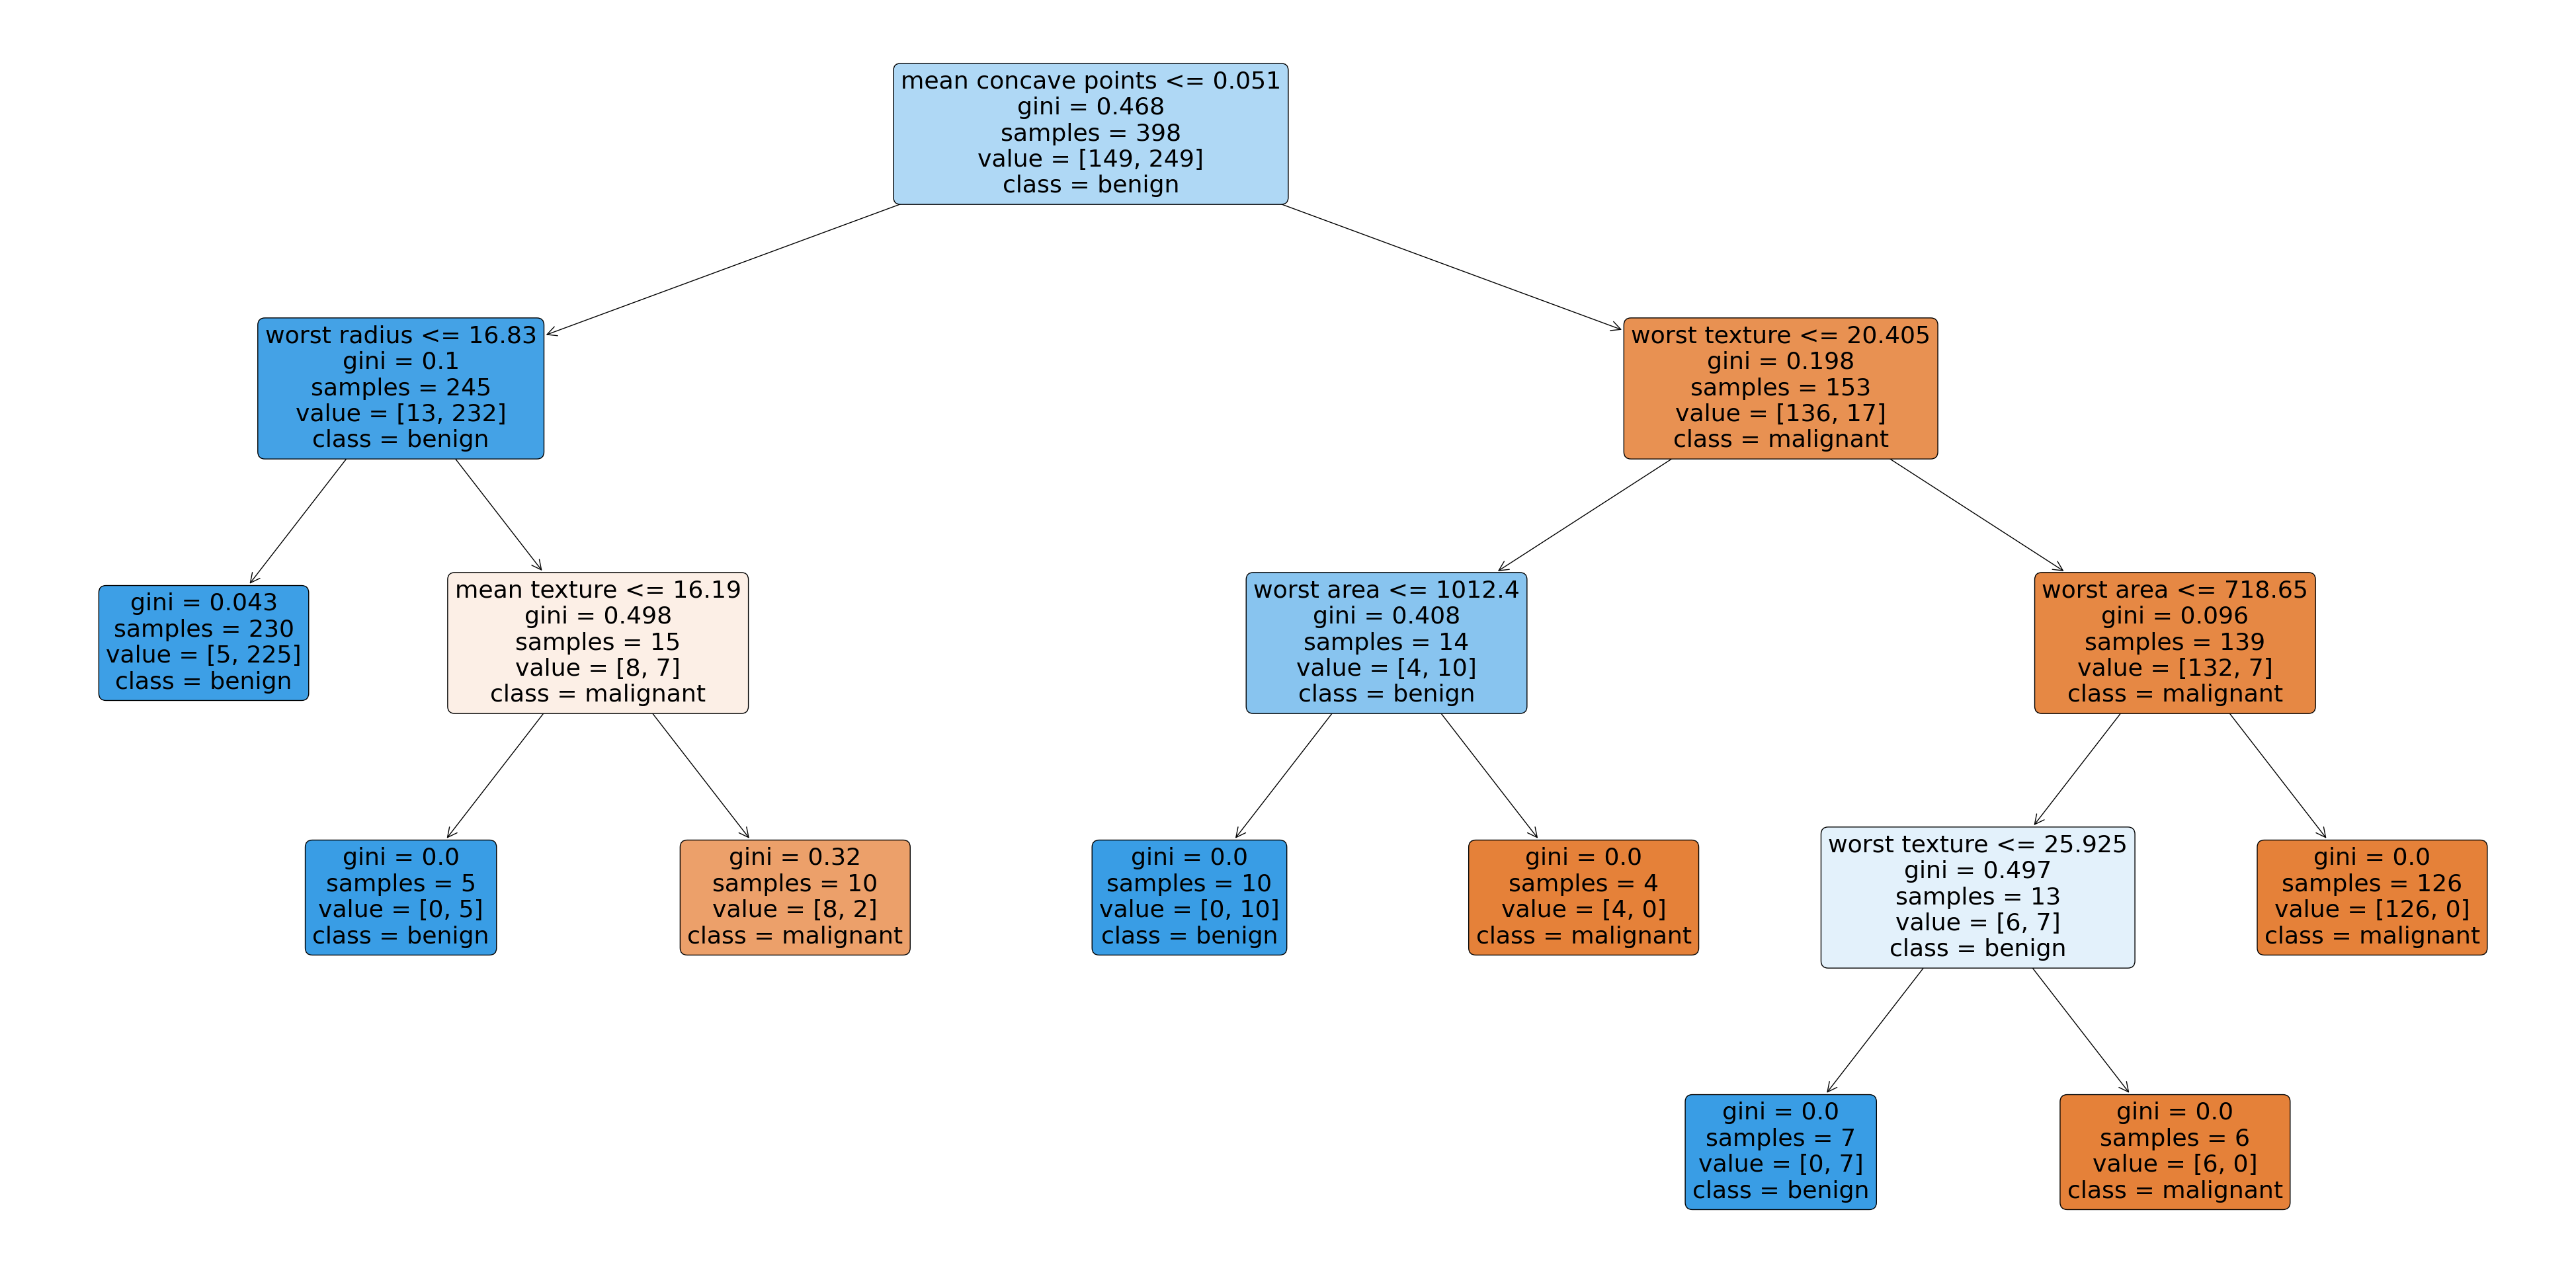

In [89]:
plt.figure(figsize = (50,25))
tree.plot_tree(model,feature_names = f_name,class_names = t_name,filled = True,rounded = True)
plt.show

# Experiment 5 use max_depth,max_leaf_nodes

In [90]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8,max_depth = 4)
model = clf.fit(x_train,y_train)

print(model.get_depth())

print(model.get_n_leaves())

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

4
8
Train Data Accuracy  0.9824120603015075
Test Data Accuracy 0.9590643274853801


<function matplotlib.pyplot.show(close=None, block=None)>

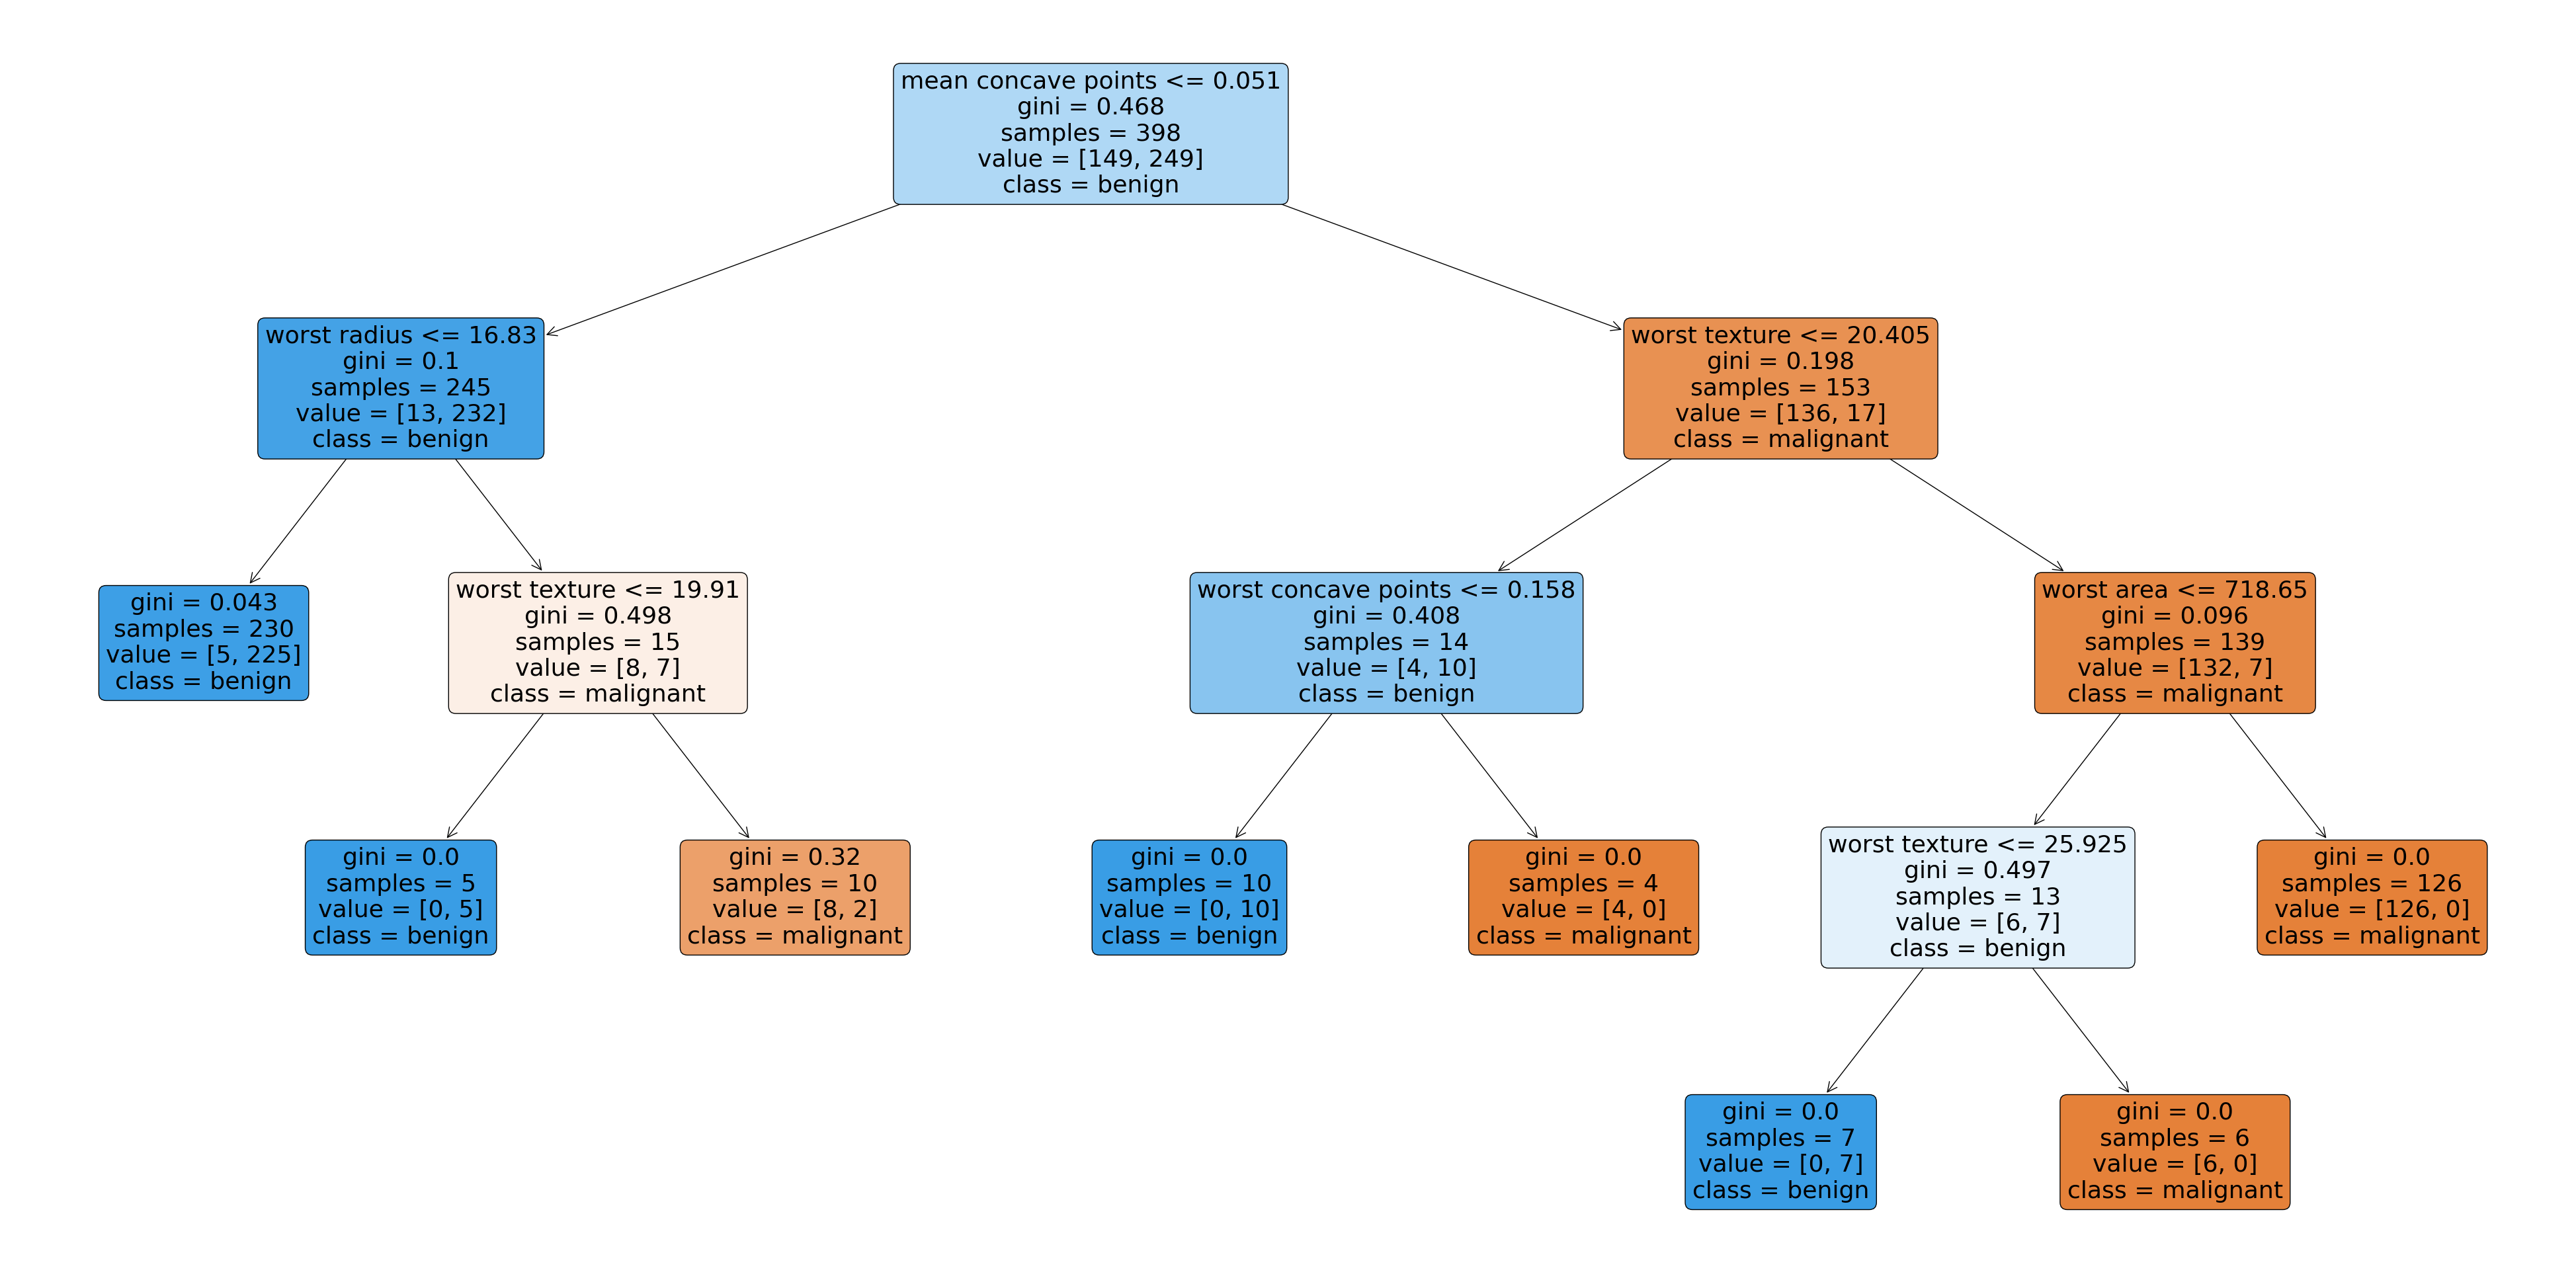

In [91]:
plt.figure(figsize = (50,25))
tree.plot_tree(model,feature_names = f_name,class_names = t_name,filled = True,rounded = True)
plt.show

In [97]:
from sklearn.model_selection import GridSearchCV,KFold 

In [98]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':['gini','entropy']
}

In [102]:
grid_search = GridSearchCV(estimator = clf,param_grid = params,scoring = 'accuracy',n_jobs = 1,verbose = 1)

In [103]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [107]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019511,0.008616,0.000431,0.000862,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9000,0.8875,0.9125,0.898734,0.936709,0.907089,0.016795,50
1,0.008041,0.005267,0.000608,0.001217,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9000,0.9000,0.9375,0.911392,0.949367,0.919652,0.020210,9
2,0.006531,0.005648,0.005344,0.005690,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9375,0.9000,0.9000,0.911392,0.949367,0.919652,0.020210,9
3,0.009036,0.001385,0.000320,0.000639,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9375,0.9000,0.9000,0.911392,0.924051,0.914589,0.014494,28
4,0.002707,0.005414,0.009015,0.008360,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.9375,0.9000,0.9000,0.911392,0.924051,0.914589,0.014494,28
5,0.011948,0.005975,0.003051,0.006101,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.9375,0.8875,0.9250,0.924051,0.924051,0.919620,0.016850,16
6,0.009164,0.005875,0.002999,0.005997,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.9125,0.9000,0.9375,0.898734,0.949367,0.919620,0.020379,16
7,0.010032,0.006214,0.003000,0.006000,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.9375,0.9000,0.9000,0.911392,0.949367,0.919652,0.020210,9
8,0.008006,0.006754,0.003051,0.006102,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.9375,0.9000,0.9000,0.911392,0.924051,0.914589,0.014494,28
9,0.006050,0.007410,0.002957,0.005915,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.9375,0.9000,0.9000,0.911392,0.924051,0.914589,0.014494,28


In [109]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=8,
                       min_samples_leaf=10)

In [110]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}

In [111]:
grid_search.best_score_

0.9422468354430379

In [120]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 3,min_samples_leaf = 10,max_leaf_nodes = 8)
model = clf.fit(x_train,y_train)

print(model.get_depth())

model.get_n_leaves()

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

3
Train Data Accuracy  0.964824120603015
Test Data Accuracy 0.9649122807017544


In [124]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69793901, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02396691, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07185873, 0.08919673, 0.11703863, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [127]:
important = model.feature_importances_
for i,v in enumerate(important):
    print('Feature : %d, score : %.5f'%(i,v))

Feature : 0, score : 0.00000
Feature : 1, score : 0.00000
Feature : 2, score : 0.00000
Feature : 3, score : 0.00000
Feature : 4, score : 0.00000
Feature : 5, score : 0.00000
Feature : 6, score : 0.00000
Feature : 7, score : 0.69794
Feature : 8, score : 0.00000
Feature : 9, score : 0.00000
Feature : 10, score : 0.00000
Feature : 11, score : 0.00000
Feature : 12, score : 0.00000
Feature : 13, score : 0.02397
Feature : 14, score : 0.00000
Feature : 15, score : 0.00000
Feature : 16, score : 0.00000
Feature : 17, score : 0.00000
Feature : 18, score : 0.00000
Feature : 19, score : 0.00000
Feature : 20, score : 0.07186
Feature : 21, score : 0.08920
Feature : 22, score : 0.11704
Feature : 23, score : 0.00000
Feature : 24, score : 0.00000
Feature : 25, score : 0.00000
Feature : 26, score : 0.00000
Feature : 27, score : 0.00000
Feature : 28, score : 0.00000
Feature : 29, score : 0.00000


In [130]:
feats = {}
for i,v in zip(features.columns,important):
    feats[i] = v

In [131]:
feats

{'mean radius': 0.0,
 'mean texture': 0.0,
 'mean perimeter': 0.0,
 'mean area': 0.0,
 'mean smoothness': 0.0,
 'mean compactness': 0.0,
 'mean concavity': 0.0,
 'mean concave points': 0.6979390056506259,
 'mean symmetry': 0.0,
 'mean fractal dimension': 0.0,
 'radius error': 0.0,
 'texture error': 0.0,
 'perimeter error': 0.0,
 'area error': 0.023966909450228446,
 'smoothness error': 0.0,
 'compactness error': 0.0,
 'concavity error': 0.0,
 'concave points error': 0.0,
 'symmetry error': 0.0,
 'fractal dimension error': 0.0,
 'worst radius': 0.07185872780233699,
 'worst texture': 0.0891967305183329,
 'worst perimeter': 0.11703862657847575,
 'worst area': 0.0,
 'worst smoothness': 0.0,
 'worst compactness': 0.0,
 'worst concavity': 0.0,
 'worst concave points': 0.0,
 'worst symmetry': 0.0,
 'worst fractal dimension': 0.0}

In [137]:
feature_2 = features[['mean concave points','area error','worst radius','worst texture','worst perimeter']]

In [133]:
features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [138]:
feature_2

,mean concave points,area error,worst radius,worst texture,worst perimeter
0,0.14710,153.40,25.380,17.33,184.60
1,0.07017,74.08,24.990,23.41,158.80
2,0.12790,94.03,23.570,25.53,152.50
3,0.10520,27.23,14.910,26.50,98.87
4,0.10430,94.44,22.540,16.67,152.20
...,...,...,...,...,...
564,0.13890,158.70,25.450,26.40,166.10
565,0.09791,99.04,23.690,38.25,155.00
566,0.05302,48.55,18.980,34.12,126.70
567,0.15200,86.22,25.740,39.42,184.60


In [140]:
x_train, x_test, y_train, y_test = train_test_split(feature_2, target, test_size=0.30, random_state=42)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 3,min_samples_leaf = 10,max_leaf_nodes = 8)
model = clf.fit(x_train,y_train)

print(model.get_depth())

model.get_n_leaves()

train_error = model.predict(x_train)
test_error = model.predict(x_test)

print('Train Data Accuracy ',accuracy_score(y_train,train_error))
print('Test Data Accuracy', accuracy_score(y_test,test_error))

3
Train Data Accuracy  0.964824120603015
Test Data Accuracy 0.9649122807017544


In [141]:
target.value_counts()

target
1    357
0    212
Name: count, dtype: int64